### 1. Judul / Topik Project dan Identitas Lengkap


**Topik**: Penerapan Machine Learning dengan model Linear Regression, Random Forest, dan Gradient Boosting untuk Prediksi Harga Rumah di Jakarta Selatan
**Nama**: Naza Izul Haki
**NIM**: A11.2022.14380
**Mata Kuliah**: Data Mining  
**Tugas Akhir Semester (UAS)**  

---

### 2. Ringkasan dan Permasalahan Project + Tujuan yang Akan Dicapai + Model / Alur Penyelesaian

#### Ringkasan
Proyek ini bertujuan untuk membangun model prediksi harga rumah menggunakan beberapa model algoritma seperti Linear Regression, Random Forest, dan Gradient Boosting Regressor. Dataset yang digunakan mencakup fitur-fitur seperti luas tanah, luas bangunan, jumlah kamar tidur, jumlah kamar mandi, dan keberadaan garasi. Prediksi harga rumah di daerah Jakarta Selatan yang akurat akan membantu pembeli dan penjual dalam menentukan nilai wajar properti.

#### Permasalahan Project
Menentukan harga rumah yang akurat berdasarkan fitur-fitur properti merupakan tantangan yang kompleks. Variasi luas tanah, bangunan, dan fasilitas rumah dapat memengaruhi harga dengan signifikan. Tantangan utama adalah menciptakan model yang dapat menangkap hubungan kompleks ini untuk memberikan estimasi harga yang tepat.

#### Tujuan yang Akan Dicapai
1. Membangun model prediksi harga rumah berbasis beberapa algoritma.
2. Mengoptimalkan parameter model untuk mendapatkan performa terbaik.
3. Mengevaluasi performa model menggunakan metrik R² dan Mean Squared Error (MSE).
4. Memberikan wawasan tentang fitur yang paling berpengaruh terhadap harga rumah.
5. Mengembangkan model prediksi harga rumah yang akurat berdasarkan fitur-fitur properti yang tersedia. Model ini diharapkan dapat membantu calon pembeli, penjual, atau investor dalam menentukan nilai rumah dengan lebih akurat.

#### Alur / Model Penyelesaian

1. **Pengumpulan Data**: Dataset harga rumah dikumpulkan dari https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah
2. **Eksplorasi Data (EDA)**: Menganalisis data untuk memahami distribusi, hubungan antar fitur, dan outlier.
3. **Preprocessing**:
- Menangani nilai kosong, mengubah data kategorikal menjadi numerik.
- Transformasi Log dilakukan untuk membuat distribusi target lebih normal.
- Melakukan normalisasi atau scaling pada fitur lainnya.
4. **Modeling**:
- Membagi data menjadi training dan testing.
- Melatih model (Linear Regression, Random Forest, Gradient Boosting) pada data yang telah diproses.
5. **Evaluasi**: Evaluasi dilakukan dalam skala log (menggunakan R² dan MSE).
Prediksi dikembalikan ke skala asli menggunakan np.expm1() untuk interpretasi yang lebih mudah.
6. **Kesimpulan**:
- Menyimpulkan performa model terbaik.
- Menyediakan hasil akhir prediksi harga rumah dalam skala asli.

**Bagan Alur Proses:**
Untuk melihat bagan alur, klik tautan berikut:  
[Bagan Alur Penyelesaian](https://github.com/nazaizull/DM-A11.2022.14380-UAS/blob/main/alurpenyelesaian.png)

Mulai -> Load Data -> EDA dan Preprocessing Data -> Modelling -> Evaluasi Model -> Kesimpulan -> Selesai

---

### 3. Penjelasan Dataset, EDA, dan Proses Features Dataset

#### Dataset
Dataset harga rumah jaksel terdiri dari 7 kolom dengan jumlah data yaitu 1003 data. Kolom tersebut terdiri dari:
- `LT`: Luas Tanah (m²)
- `LB`: Luas Bangunan (m²)
- `JKT`: Jumlah Kamar Tidur
- `JKM`: Jumlah Kamar Mandi
- `GRS`: Keberadaan Garasi (1: Ada, 0: Tidak Ada)
- `HARGA`: Harga Rumah (Target)
- `KOTA`: Lokasi rumah, dalam hal ini seluruhnya berada di wilayah Jakarta Selatan (disingkat "JAKSEL").

#### Eksplorasi Data dan Analisis (EDA)
EDA dilakukan untuk memahami distribusi data, mengidentifikasi outlier, dan melihat hubungan antar fitur. Heatmap korelasi digunakan untuk memahami hubungan antara fitur dengan target `HARGA`.

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'HARGA RUMAH JAKSEL.xlsx'
df = pd.read_excel(file_path, header=1, usecols=['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS'])

# Info dataset
df.info()

# Statistik deskriptif
df.describe()

# Visualisasi distribusi harga rumah
plt.figure(figsize=(10, 6))
sns.histplot(df['HARGA'], kde=True, bins=30)
plt.title("Distribusi Harga Rumah")
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()
```

#### Proses Features Dataset
- Mengubah fitur kategorikal `GRS` menjadi numerik.
- Melakukan normalisasi data menggunakan `StandardScaler` untuk memastikan skala yang seragam.
- Transformasi log diterapkan pada target HARGA untuk mengurangi skewness data:

```python
from sklearn.preprocessing import StandardScaler

# Encoding fitur GRS
df['GRS'] = df['GRS'].map({'ADA': 1, 'TIDAK ADA': 0})

# Definisi fitur dan target
X = df[['LT', 'LB', 'JKT', 'JKM', 'GRS']]
y = df['HARGA']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_log = np.log1p(y)

```

---

### 4. Proses Learning / Modeling

Tiga model digunakan untuk membandingkan performa: Linear Regression, Random Forest, dan Gradient Boosting. Model terbaik ditentukan berdasarkan evaluasi metrik R² dan MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(x_train, y_train)
```

---

### 5. Performa Model

Evaluasi dilakukan untuk membandingkan performa model. Metrik yang digunakan adalah R² dan Mean Squared Error (MSE).

```python
# Evaluasi Linear Regression
y_pred_lr = lr_model.predict(x_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Evaluasi Random Forest
y_pred_rf = rf_model.predict(x_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Evaluasi Gradient Boosting
y_pred_gb = gb_model.predict(x_test)
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Tampilkan hasil
print(f"Linear Regression - R²: {r2_lr:.4f}, MSE: {mse_lr:.2f}")
print(f"Random Forest - R²: {r2_rf:.4f}, MSE: {mse_rf:.2f}")
print(f"Gradient Boosting - R²: {r2_gb:.4f}, MSE: {mse_gb:.2f}")
```

---

### 6. Diskusi Hasil dan Kesimpulan

#### Diskusi Hasil
- Model Gradient Boosting memberikan performa terbaik dengan R² tertinggi dan MSE terendah dibandingkan dengan Linear Regression dan Random Forest.
- Fitur `LB` (Luas Bangunan) dan `LT` (Luas Tanah) memiliki pengaruh terbesar terhadap harga rumah berdasarkan analisis Feature Importance.

```python
# Feature Importance untuk Gradient Boosting
features = ['LT', 'LB', 'JKT', 'JKM', 'GRS']
importance = gb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
```

#### Kesimpulan
1. Gradient Boosting adalah model terbaik untuk prediksi harga rumah dengan performa terbaik dibandingkan Linear Regression dan Random Forest dengan R² sebesar 0.8157..
2. Model ini dapat digunakan untuk membantu pembeli atau penjual rumah menentukan nilai properti secara akurat.
3. Penambahan fitur geografis atau ekonomis mungkin dapat meningkatkan performa model di masa depan.


**Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



**Load Datasets**

In [2]:
# Path file yang benar dari file yang diunggah
file_path = 'HARGA RUMAH JAKSEL.xlsx'

# Membaca dataset tanpa filter
df = pd.read_excel(file_path)

# Menampilkan nama kolom
print(df.columns)



Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')


In [3]:
df = pd.read_excel(file_path, header=1, usecols=['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS'])
  # Menggunakan baris kedua sebagai header
print(df.columns)

Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS'], dtype='object')


**Sneak Peak Data**

In [4]:
#Melihat 5 baris teratas dari data
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,28000000000,1100,700,5,6,ADA
1,19000000000,824,800,4,4,ADA
2,4700000000,500,400,4,3,ADA
3,4900000000,251,300,5,4,ADA
4,28000000000,1340,575,4,5,ADA


In [5]:
#Mengetahui jumlah kolom dan baris dari data
df.shape

(1001, 6)

In [6]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa masih ada data yang kategorikal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.1+ KB


In [7]:
# Menggunakan map untuk mengganti 'ADA' menjadi 1 dan 'TIDAK ADA' menjadi 0
df['GRS'] = df['GRS'].map({'ADA': 1, 'TIDAK ADA': 0})



In [8]:
#Menampilkan GRS ( garasi )
print(df['GRS'].head())

0    1
1    1
2    1
3    1
4    1
Name: GRS, dtype: int64


In [9]:
pd.DataFrame(df['GRS'].value_counts().reset_index())

,GRS,count
0,1,779
1,0,222


In [10]:
#Melihat statistical description dari data
df.describe()

,HARGA,LT,LB,JKT,JKM,GRS
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060,0.778222
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261,0.415650
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000,0.000000
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000,1.000000
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000,1.000000
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000,1.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000,1.000000


**Handling Missing Values**


In [11]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

,0
HARGA,0
LT,0
LB,0
JKT,0
JKM,0
GRS,0


**Exploratory Data Analyst ( EDA )**

In [12]:
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,28000000000,1100,700,5,6,1
1,19000000000,824,800,4,4,1
2,4700000000,500,400,4,3,1
3,4900000000,251,300,5,4,1
4,28000000000,1340,575,4,5,1


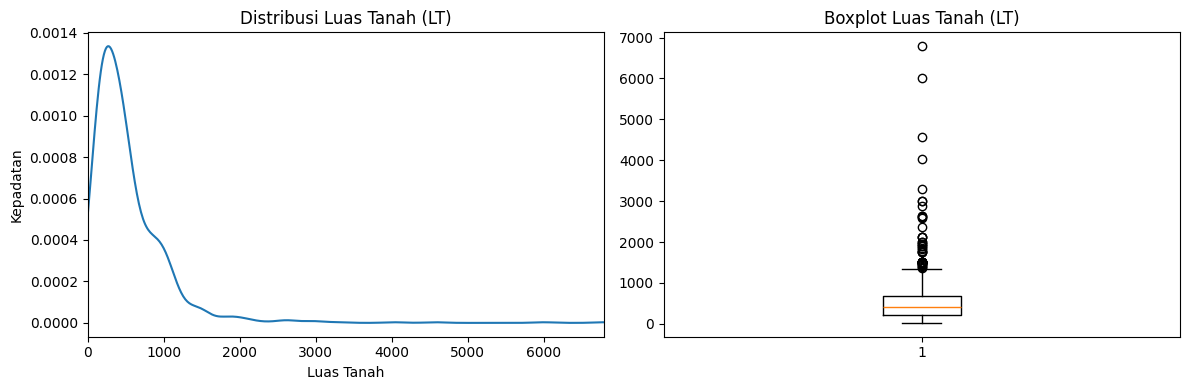

In [13]:
# Univariate analysis LT
# Melihat distribusi dari LT
# Visualisasi dengan KDE yang dibatasi pada rentang data asli
f = plt.figure(figsize=(12, 4))

# Subplot 1: Distribusi dengan KDE (batasi pada rentang positif)
ax1 = f.add_subplot(1, 2, 1)
df['LT'].plot(kind='kde', ax=ax1, xlim=(0, df['LT'].max()))
ax1.set_title("Distribusi Luas Tanah (LT)")
ax1.set_xlabel("Luas Tanah")
ax1.set_ylabel("Kepadatan")

# Subplot 2: Boxplot untuk Luas Tanah
ax2 = f.add_subplot(1, 2, 2)
plt.boxplot(df['LT'])
ax2.set_title("Boxplot Luas Tanah (LT)")
ax2.set_xlabel("")

plt.tight_layout()
plt.show()



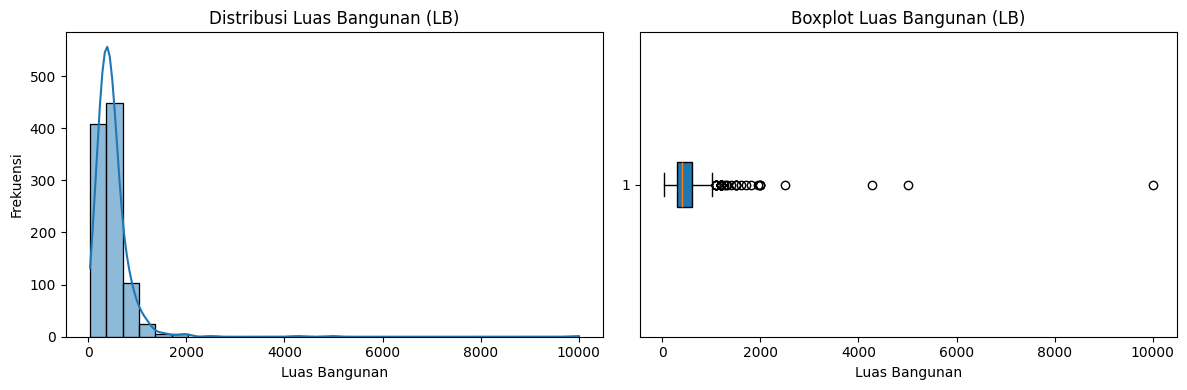

In [14]:
# Univariate analysis LB
# Melihat distribusi dari LB
f = plt.figure(figsize=(12, 4))

# Subplot 1: Histogram untuk distribusi LB
f.add_subplot(1, 2, 1)
sns.histplot(df['LB'], bins=30, kde=True)  # Gunakan histogram untuk data numerik
plt.title("Distribusi Luas Bangunan (LB)")
plt.xlabel("Luas Bangunan")
plt.ylabel("Frekuensi")

# Subplot 2: Boxplot untuk melihat outlier LB
f.add_subplot(1, 2, 2)
plt.boxplot(df['LB'], vert=False, patch_artist=True)
plt.title("Boxplot Luas Bangunan (LB)")
plt.xlabel("Luas Bangunan")

plt.tight_layout()
plt.show()


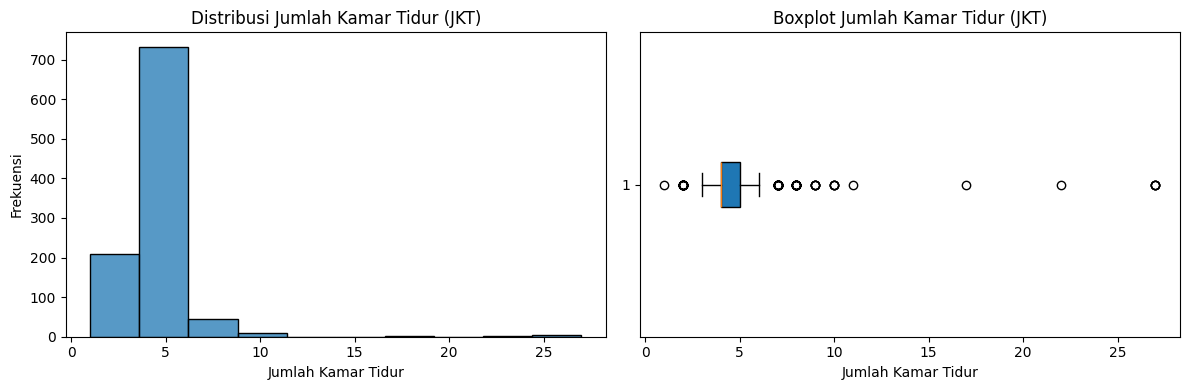

In [15]:
# Univariate analysis JKT
# Melihat distribusi dari JKT
f = plt.figure(figsize=(12, 4))

# Subplot 1: Histogram untuk distribusi JKT
f.add_subplot(1, 2, 1)
sns.histplot(df['JKT'], bins=10, kde=False)  # Histogram untuk data numerik
plt.title("Distribusi Jumlah Kamar Tidur (JKT)")
plt.xlabel("Jumlah Kamar Tidur")
plt.ylabel("Frekuensi")

# Subplot 2: Boxplot untuk melihat outlier JKT
f.add_subplot(1, 2, 2)
plt.boxplot(df['JKT'], vert=False, patch_artist=True)
plt.title("Boxplot Jumlah Kamar Tidur (JKT)")
plt.xlabel("Jumlah Kamar Tidur")

plt.tight_layout()
plt.show()


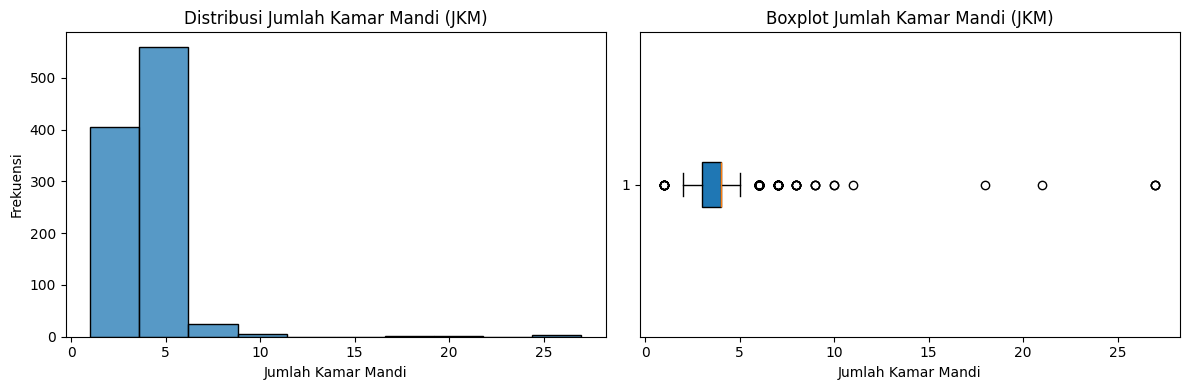

In [16]:
# Univariate analysis JKM
# Melihat distribusi dari JKM
f = plt.figure(figsize=(12, 4))

# Subplot 1: Histogram untuk distribusi JKM
f.add_subplot(1, 2, 1)
sns.histplot(df['JKM'], bins=10, kde=False)  # Histogram lebih cocok untuk data numerik
plt.title("Distribusi Jumlah Kamar Mandi (JKM)")
plt.xlabel("Jumlah Kamar Mandi")
plt.ylabel("Frekuensi")

# Subplot 2: Boxplot untuk melihat outlier JKM
f.add_subplot(1, 2, 2)
plt.boxplot(df['JKM'], vert=False, patch_artist=True)
plt.title("Boxplot Jumlah Kamar Mandi (JKM)")
plt.xlabel("Jumlah Kamar Mandi")

plt.tight_layout()
plt.show()


<ipython-input-17-a9541dc5c05a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['GRS'], order=[1, 0], palette="Blues")


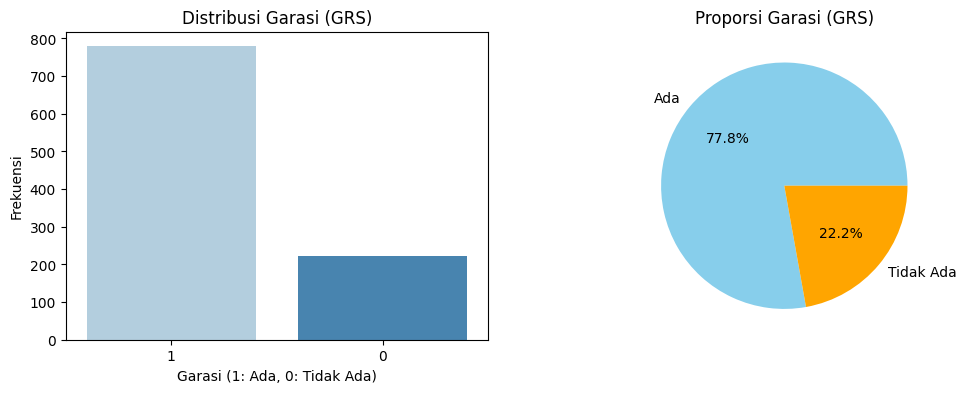

<Figure size 640x480 with 0 Axes>

In [17]:
# Univariate analysis GRS
# Melihat distribusi dari GRS
f = plt.figure(figsize=(12, 4))

# Subplot 1: Histogram untuk distribusi GRS

# Visualisasi distribusi GRS menggunakan countplot
f.add_subplot(1, 2, 1)
sns.countplot(x=df['GRS'], order=[1, 0], palette="Blues")
plt.title("Distribusi Garasi (GRS)")
plt.xlabel("Garasi (1: Ada, 0: Tidak Ada)")
plt.ylabel("Frekuensi")


# Visualisasi proporsi GRS menggunakan pie chart
f.add_subplot(1, 2, 2)
df['GRS'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Ada', 'Tidak Ada'], colors=['skyblue', 'orange']
)
plt.title("Proporsi Garasi (GRS)")
plt.ylabel("")  # Hilangkan label sumbu Y
plt.show()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

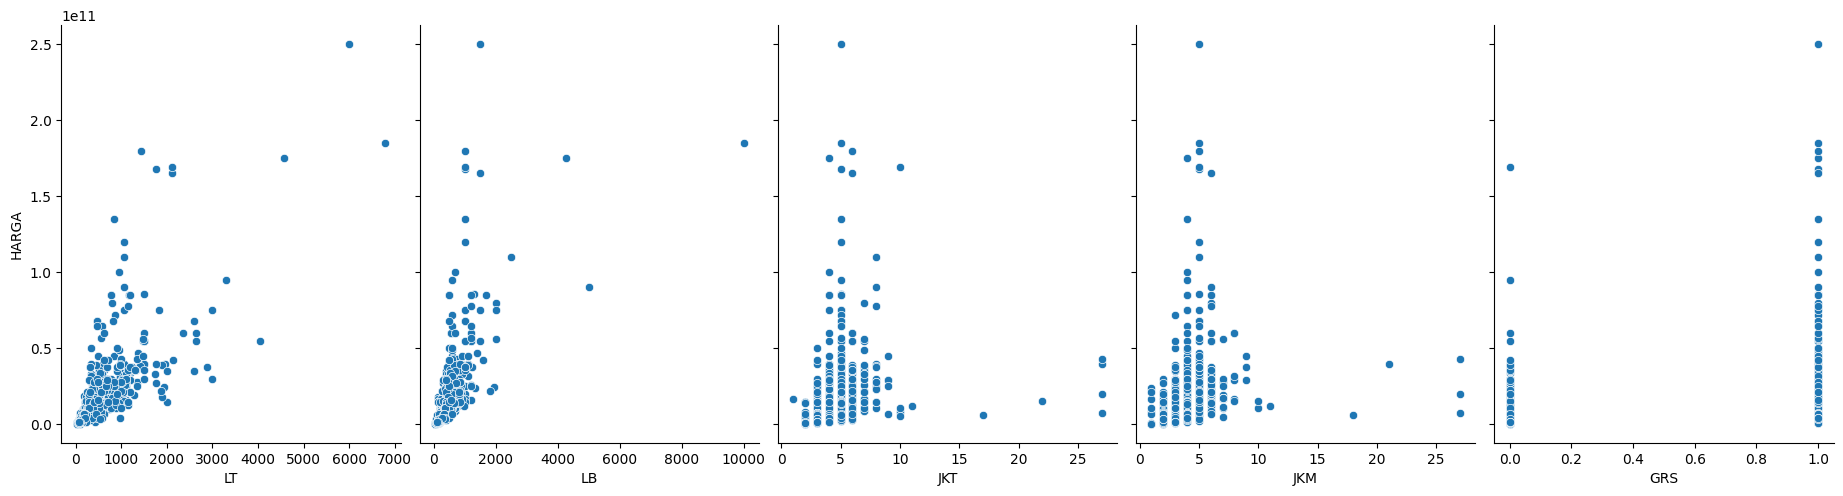

In [18]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=[ 'LT', 'LB', 'JKT', 'JKM', 'GRS'], y_vars=['HARGA'], size=5, aspect=0.75)
plt.show()

In [19]:
# Mengetahui nilai korelasi
correlation_matrix = df.corr()

# Menampilkan matriks korelasi dengan gaya gradient warna
correlation_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}")


,HARGA,LT,LB,JKT,JKM,GRS
HARGA,1.00,0.74,0.65,0.22,0.23,0.10
LT,0.74,1.00,0.68,0.21,0.22,0.06
LB,0.65,0.68,1.00,0.21,0.23,0.09
JKT,0.22,0.21,0.21,1.00,0.85,0.04
JKM,0.23,0.22,0.23,0.85,1.00,0.07
GRS,0.10,0.06,0.09,0.04,0.07,1.00


LT (Luas Tanah): Korelasi 0.74 (positif tinggi).
Luas tanah memiliki hubungan linear yang kuat dengan harga rumah.

LB (Luas Bangunan): Korelasi 0.70 (positif tinggi).
Luas bangunan juga memiliki hubungan kuat dengan harga rumah.

GRS (Garasi): Korelasi 0.08 (positif rendah).
Garasi memiliki hubungan sangat lemah dengan harga rumah.

**Modelling**

In [20]:
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,28000000000,1100,700,5,6,1
1,19000000000,824,800,4,4,1
2,4700000000,500,400,4,3,1
3,4900000000,251,300,5,4,1
4,28000000000,1340,575,4,5,1


In [21]:
#Pertama, buat variabel x dan y
x = df.drop(columns='HARGA')
y = df['HARGA']

In [22]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [23]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 5)
(800,)
(201, 5)
(201,)


Menggunakan Model Regresi

In [24]:
#Ketiga membuat object linear regresi
lin_reg = LinearRegression()

In [25]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [26]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.67604577e+07 1.43654588e+07 5.72614432e+08 5.17222168e+07
 1.93132228e+09]
-2821411329.521076


In [27]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,LT,1.676046e+07
1,LB,1.436546e+07
2,JKT,5.726144e+08
3,JKM,5.172222e+07
4,GRS,1.931322e+09


In [28]:
y_pred = lin_reg.predict(x_test)

In [29]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.6639662862746467

Dengan Model Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Pertama, buat variabel x dan y
x = df.drop(columns='HARGA')
y = df['HARGA']

# Kedua, split data menjadi training dan testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Ketiga, buat object Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=4, n_estimators=100)

# Keempat, train the model menggunakan training data yang sudah displit
rf_reg.fit(x_train, y_train)

# Kelima, prediksi harga rumah menggunakan testing data
y_pred_rf = rf_reg.predict(x_test)

# Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
rf_score = rf_reg.score(x_test, y_test)
print(f"Random Forest Accuracy (R²): {rf_score:.4f}")


Random Forest Accuracy (R²): 0.6688


Dengan Model Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Pertama, buat variabel x dan y
x = df.drop(columns='HARGA')
y = df['HARGA']

# Kedua, split data menjadi training dan testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Ketiga, buat object Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=4, n_estimators=100)

# Keempat, train the model
gb_reg.fit(x_train, y_train)

# Kelima, prediksi harga rumah menggunakan testing data
y_pred_gb = gb_reg.predict(x_test)

# Keenam, kita cari tahu accuracy score
gb_score = gb_reg.score(x_test, y_test)
print(f"Gradient Boosting Accuracy (R²): {gb_score:.4f}")


Gradient Boosting Accuracy (R²): 0.7073


Perbandingan Model

In [32]:
print("Model Comparison:")
print(f"Linear Regression Accuracy (R²): {lin_reg.score(x_test, y_test):.4f}")
print(f"Random Forest Accuracy (R²): {rf_reg.score(x_test, y_test):.4f}")
print(f"Gradient Boosting Accuracy (R²): {gb_score:.4f}")


Model Comparison:
Linear Regression Accuracy (R²): 0.6640
Random Forest Accuracy (R²): 0.6688
Gradient Boosting Accuracy (R²): 0.7073


Karena model Gradient Boosting memiliki accuracy tertinggi maka akan dipilih untuk model di project ini

In [33]:
from sklearn.model_selection import GridSearchCV

# Contoh parameter GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Inisialisasi model
gb_model = GradientBoostingRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Latih model dengan data training
grid_search.fit(x_train, y_train)

# Ambil model terbaik
best_gb_model = grid_search.best_estimator_

# Cek parameter terbaik (opsional)
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [34]:
import pickle
with open('best_gb_model.pkl', 'wb') as f:
    pickle.dump(best_gb_model, f)
print("Model terbaik berhasil disimpan")


Model terbaik berhasil disimpan


In [35]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Normalisasi data training
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Transformasi logaritmik pada target
y_train_log = np.log1p(y_train)

# Latih model dengan data yang sudah di-normalisasi dan ditransformasi log
gb_model.fit(x_train_scaled, y_train_log)

# Simpan scaler dan model
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('best_gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

# Transformasi log pada y_test
y_test_log = np.log1p(y_test)

# Prediksi pada data uji
x_test_scaled = scaler.transform(x_test)
y_pred_log = gb_model.predict(x_test_scaled)

# Evaluasi menggunakan data log
r2 = r2_score(y_test_log, y_pred_log)
mse = mean_squared_error(y_test_log, y_pred_log)
print(f"Best R² Score (log-transformed): {r2:.4f}")
print(f"Mean Squared Error (log-transformed): {mse:.2f}")

# Konversi kembali prediksi ke skala asli untuk interpretasi
y_pred = np.expm1(y_pred_log)

# Prediksi dengan data baru
new_data = pd.DataFrame([[66, 42, 2, 1, 0]], columns=['LT', 'LB', 'JKT', 'JKM', 'GRS'])
new_data_scaled = scaler.transform(new_data)
predicted_log = gb_model.predict(new_data_scaled)
predicted_price = np.expm1(predicted_log)
print(f"Prediksi harga rumah: Rp {predicted_price[0]:,.2f}")


Best R² Score (log-transformed): 0.8157
Mean Squared Error (log-transformed): 0.15
Prediksi harga rumah: Rp 526,436,866.11


Jumlah fitur: 5
Panjang importance: 5


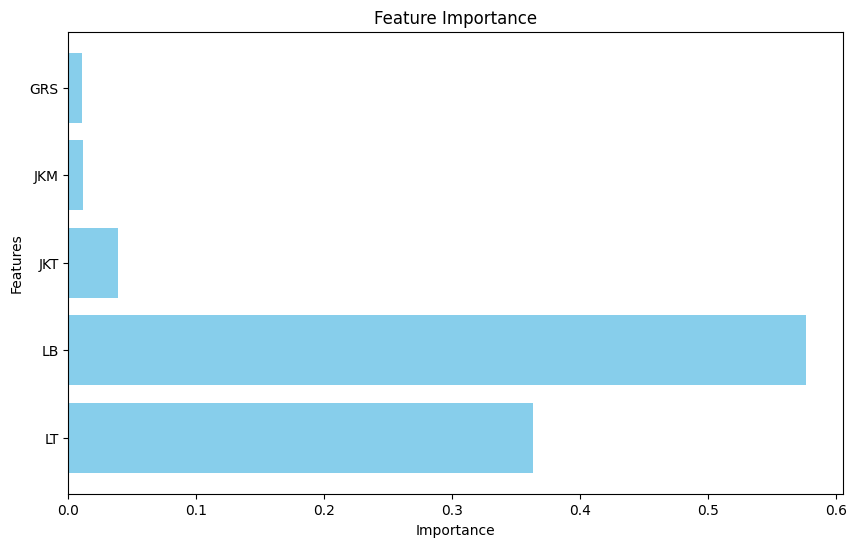

In [36]:
# Pastikan kolom yang digunakan sama seperti saat melatih model
X = df[['LT', 'LB', 'JKT', 'JKM', 'GRS']]  # Kolom fitur

# Mendapatkan Feature Importance dari model terbaik
importance = best_gb_model.feature_importances_

# Menampilkan fitur yang digunakan
features = X.columns

# Pastikan panjang 'importance' dan 'features' cocok
print(f"Jumlah fitur: {len(features)}")
print(f"Panjang importance: {len(importance)}")

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
